In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruit-and-vegetable-image-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F952827%2F3173719%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240803%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240803T112245Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da18768dd0cf287e2e8c0116850563f703b2a5b093f060d50ea8ec7392d7280292cbed41703ea95c105fb04c0a77bcd0f112f2a6cb905353ce2efacedb6843b0ab21a8eba5efb1d059f1b56443cc123a42b2b07e2bb0797f1dc8a10ea64b93d78f73aa6ea9feed7297d9ada2d61fabf4e333ba32155e064f37f07f2c51f78384b8c2388e9c7152fcab9d1dcad867af56c251835b38c5ee0aec5d821b7c4baf6a2790cf19ff63d840a51f4ccba5ec2af38d64f80639aad56ba0e9d93e6cbb54af7880b153e8bf4929f6d9f1022cb9a93ea58526a60de2f562f812c6ec1d32fc26ebe1d02990d3221da34213b1ccd2c2e24c2eb9467b6866bd60fcddb783e092bfa'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2130757290 bytes downloaded
Downloaded and uncompressed: fruit-and-vegetable-image-recognition
Data source import complete.


In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [ ]:
#create transform
transform = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.5,0.5,0.5], std=[0.5,0.5,0.5  ])
    ]
)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'
val_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'
test_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/test'

In [ ]:
#split dataset
training = ImageFolder(train_dir, transform=transform)
test = ImageFolder(test_dir, transform=transform)
validation = ImageFolder(val_dir, transform=transform)
batch_size = 32
train_loader = DataLoader(training,  batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test,  batch_size=batch_size)
valid_loader = DataLoader(validation,  batch_size=batch_size)
print(f'train_loader:{len(training)}, test_loader:{len(test)}, valid_loader:{len(validation)}, total classes:{len(training.classes)}, classes:{training.classes}')

train_loader:3115, test_loader:359, valid_loader:351, total classes:36, classes:['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
num_classes = len(training.classes)
model = SimpleCNN(num_classes)
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

Using device: cuda:0


In [ ]:
num_epochs = 10

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(training)
        epoch_acc = running_corrects.double() / len(training)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(validation)
        epoch_acc = running_corrects.double() / len(validation)

        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Save the best model
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_model.pth')

    print(f'Best val Acc: {best_acc:.4f}')
    return model

In [ ]:
trained_model = train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs)

Epoch 1/10
----------


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 3.5590 Acc: 0.0430
Val Loss: 3.3346 Acc: 0.0598
Epoch 2/10
----------
Train Loss: 3.3679 Acc: 0.0758
Val Loss: 3.0850 Acc: 0.1624
Epoch 3/10
----------
Train Loss: 3.0609 Acc: 0.1265
Val Loss: 2.4537 Acc: 0.3134
Epoch 4/10
----------
Train Loss: 2.6211 Acc: 0.2305
Val Loss: 1.8768 Acc: 0.4929
Epoch 5/10
----------
Train Loss: 2.3140 Acc: 0.3172
Val Loss: 1.5822 Acc: 0.6211
Epoch 6/10
----------
Train Loss: 2.0486 Acc: 0.3981
Val Loss: 1.1548 Acc: 0.7521
Epoch 7/10
----------
Train Loss: 1.7558 Acc: 0.4722
Val Loss: 1.0320 Acc: 0.8148
Epoch 8/10
----------
Train Loss: 1.4087 Acc: 0.5775
Val Loss: 0.5924 Acc: 0.8803
Epoch 9/10
----------
Train Loss: 1.0715 Acc: 0.6796
Val Loss: 0.3733 Acc: 0.9145
Epoch 10/10
----------
Train Loss: 0.7540 Acc: 0.7695
Val Loss: 0.3015 Acc: 0.9345
Best val Acc: 0.9345


In [ ]:

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    return accuracy, all_preds, all_labels

test_accuracy, all_preds, all_labels = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 93.31%


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

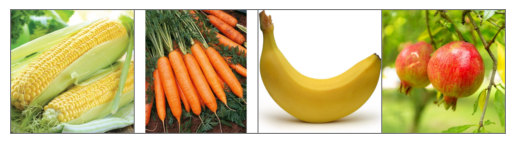

sweetcorn carrot banana pomegranate


In [ ]:
imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s' % training.classes[labels[j]] for j in range(4)))

In [ ]:
model = SimpleCNN(num_classes=len(training.classes))
model.load_state_dict(torch.load('/content/best_model.pth'))
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
path ='/content/drive/MyDrive/fruit_Classification/Image_10.jpg'
from PIL import Image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB mode
    image = transform(image)  # Apply the transformations
    image = image.unsqueeze(0)  # Add batch dimension
    return image

image = load_and_preprocess_image(path)

In [ ]:
model.eval()  # Set the model to evaluation mode
image = image.to(device)  # Move image to the device

with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output.data, 1)

# Load the class names
class_names = training.classes  # Or replace with your own list of class names

# Get the predicted class label
predicted_class_index = predicted.item()
predicted_class_label = class_names[predicted_class_index]

print(f'Predicted class: {predicted_class_label}')

Predicted class: ginger


In [39]:
import torch
from torchvision import transforms
from PIL import Image
import os

# Define the model architecture
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the same transform used for training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB mode
    image = transform(image)  # Apply the transformations
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Load the model
def load_model(model_path, num_classes):
    model = SimpleCNN(num_classes=num_classes)  # Define the model architecture
    model.load_state_dict(torch.load(model_path))  # Load the trained weights
    model.eval()  # Set the model to evaluation mode
    return model

# Path to your test image and model file
image_path = '/content/drive/MyDrive/fruit_Classification/Image_10.jpg'
model_path = '/content/best_model.pth'

# Load the model
num_classes = 36  # Replace with the number of classes in your dataset
model = load_model(model_path, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Preprocess the image
image = load_and_preprocess_image(image_path)
image = image.to(device)

# Run inference
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output.data, 1)

# Load class names if available
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']  # Replace with actual class names
predicted_class_index = predicted.item()
predicted_class_label = class_names[predicted_class_index]

print(f'Predicted class: {predicted_class_label}')


Predicted class: ginger
